## Netflix Data Analysis   * * * On Going Project * * *

### About Netflix
Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally.

This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

### Business Problem Statement
Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries

#### Importing the Libraries

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading the Dataset

In [73]:
df = pd.read_csv('netflix.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#### Exploring and Understanding Data

In [74]:
# Details on number of rows and coulmns
df.shape

(8807, 12)

So the given data set has total 8807 rows and 12 columns

In [75]:
# Lets get a high level data details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


From the above details we get to know that there are some missing values in dataset.
And the data type of most of  the columns is object which we can convert to string where ever necessary.


In [76]:
# Getting count of null values in each column
df.isna().sum(axis = 0)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Most of the nulls appear in Director, Cast and Country.

In [77]:
# 5 point summary of the numeric columns
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [78]:
# Checking wheter there are any dulicate rows
df.duplicated().sum()

0

We can clearly see there are no duplicate rows in the data

In [79]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [80]:
# lets take a detailed look on rating column
# getting list of unique values in rating column
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

We can clearly see that Rating data is mentioned incorrectly for few titles in the input file.

Source - https://help.netflix.com/en/node/2064/us

In [81]:
# lets get count of each unique values in the rating column

df.value_counts('rating')

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
UR             3
NC-17          3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [82]:
# getting count of incorrect rating data values
df[df['rating'].isin(('74 min', '84 min', '66 min','TV-Y7-FV')) ].shape[0]

9

### What type of content is created more on netflix??? (Movies or TV Shows)

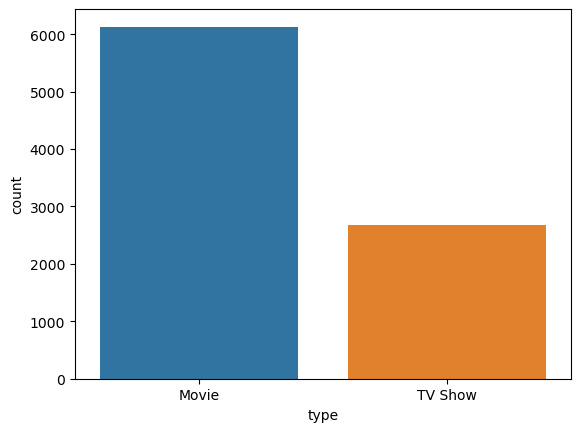

In [84]:
# lets draw Countplot on the show type column of the dataset

sns.countplot(data = df, x = 'type')
plt.show()

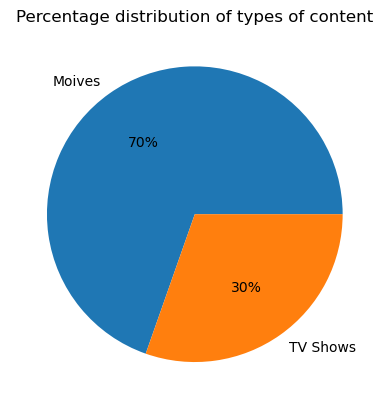

In [85]:
# lets see percentage distribution of above chart using pie chart

plt.pie(x = df['type'].value_counts(), labels = ['Moives','TV Shows'],autopct='%.0f%%')
plt.title('Percentage distribution of types of content')
plt.show()

We can observe that netflix creates more movies than TV shows

In [139]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [144]:
df.iloc[6:13]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
11,s12,TV Show,Bangkok Breaking,Kongkiat Komesiri,"Sukollawat Kanarot, Sushar Manaying, Pavarit M...",NaN,"September 23, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","Struggling to earn a living in Bangkok, a man ..."
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [159]:
# splitting the countries in different rows 

df_country = df[['show_id', 'title','type', 'country' ]]
df_country = (df_country.drop('country', axis=1)
             .join
             (
             df_country.country
             .str
             .split(', ',expand=True)
             .stack()
             .reset_index(drop=True, level=1)
             .rename('country')           
             ))


In [160]:
df_country.iloc[6:13]

,show_id,title,type,country
6,s7,My Little Pony: A New Generation,Movie,NaN
7,s8,Sankofa,Movie,United States
7,s8,Sankofa,Movie,Ghana
7,s8,Sankofa,Movie,Burkina Faso
7,s8,Sankofa,Movie,United Kingdom
7,s8,Sankofa,Movie,Germany
7,s8,Sankofa,Movie,Ethiopia


In [162]:
df_country.shape

(10845, 4)

We can clearly see the changes in count of rows from the original DataFrame. So spilt has been successfully done.

### Which are the Top content producing countries on Netflix???

In [179]:
# lets use df_country to tackle this question

df_cntry_cnt = df_country['country'].value_counts().reset_index()
df_cntry_cnt

,country,count
0,United States,3689
1,India,1046
2,United Kingdom,804
3,Canada,445
4,France,393
...,...,...
122,Bermuda,1
123,Ecuador,1
124,Armenia,1
125,Mongolia,1


In [173]:
# Alternate method ----> By using GroupBy and Aggregate methods

df_country.groupby(by = 'country')['country'].count().sort_values(ascending = False)

country
United States     3689
India             1046
United Kingdom     804
Canada             445
France             393
                  ... 
Kazakhstan           1
Jamaica              1
Slovakia             1
Somalia              1
Lithuania            1
Name: country, Length: 127, dtype: int64

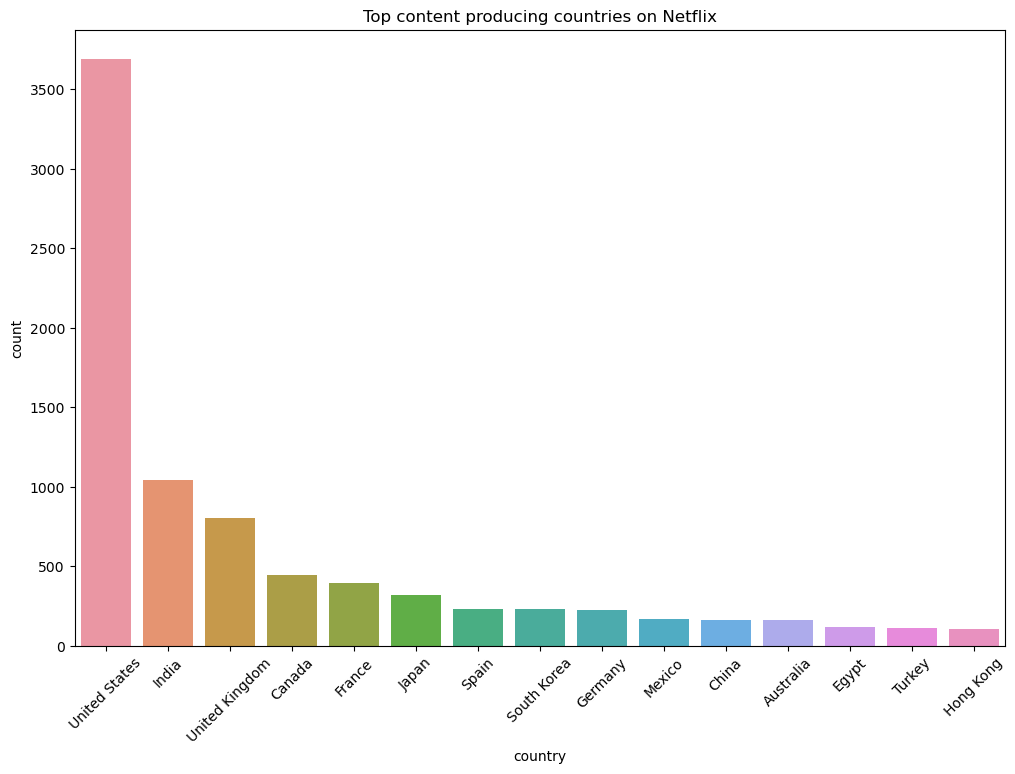

In [189]:
plt.figure(figsize = (12,8))
sns.barplot(data = df_cntry_cnt.iloc[0:15],x = 'country',y = 'count')
plt.xticks(rotation = 45)
plt.title('Top content producing countries on Netflix')
plt.show()


We can observe US produces the majority content on the netflix, followed by India and UK

In [190]:
# splitting the listed_in (i.e, genre) in different rows 

df_genre = df[['show_id', 'title','type', 'listed_in' ]]
df_genre = (df_genre.drop('listed_in', axis=1)
             .join
             (
             df_genre.listed_in
             .str
             .split(', ',expand=True)
             .stack()
             .reset_index(drop=True, level=1)
             .rename('listed_in')           
             ))

In [191]:
df_genre

,show_id,title,type,listed_in
0,s1,Dick Johnson Is Dead,Movie,Documentaries
1,s2,Blood & Water,TV Show,International TV Shows
1,s2,Blood & Water,TV Show,TV Dramas
1,s2,Blood & Water,TV Show,TV Mysteries
2,s3,Ganglands,TV Show,Crime TV Shows
...,...,...,...,...
8805,s8806,Zoom,Movie,Children & Family Movies
8805,s8806,Zoom,Movie,Comedies
8806,s8807,Zubaan,Movie,Dramas
8806,s8807,Zubaan,Movie,International Movies


### Which are the top genres with highest content on Netflix????

In [193]:
# lets use df_country to tackle this question

df_gnr_cnt = df_genre['listed_in'].value_counts().reset_index()
df_gnr_cnt

,listed_in,count
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,International TV Shows,1351
4,Documentaries,869
5,Action & Adventure,859
6,TV Dramas,763
7,Independent Movies,756
8,Children & Family Movies,641
9,Romantic Movies,616


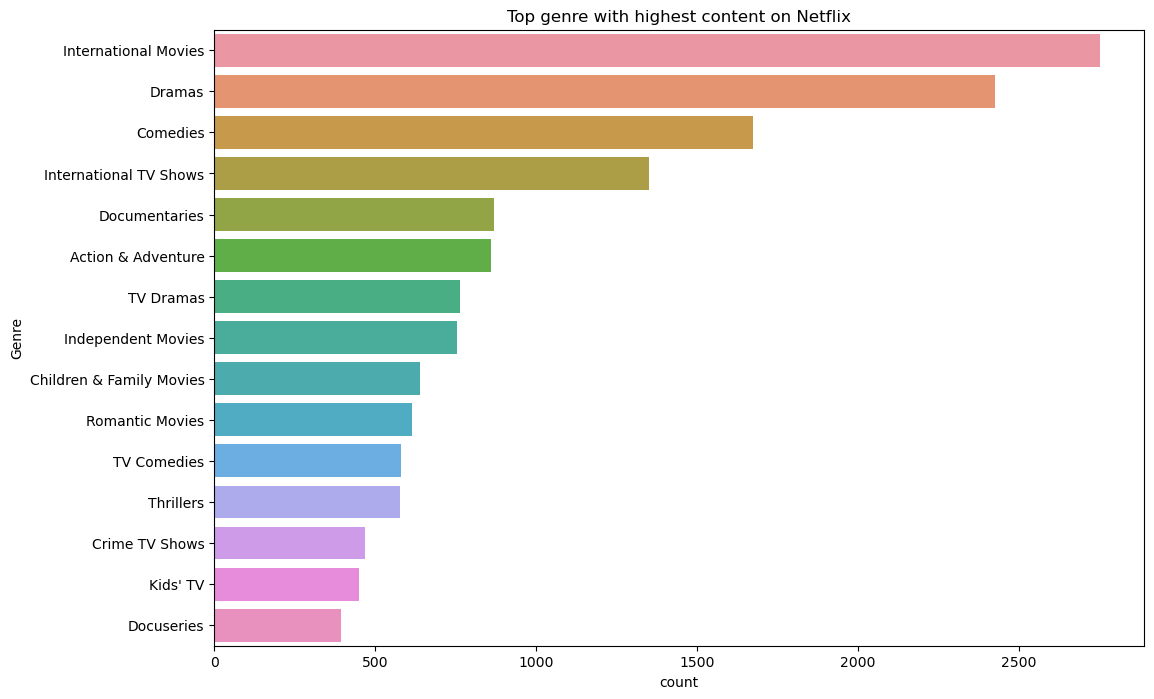

In [198]:
plt.figure(figsize = (12,8))
sns.barplot(data = df_gnr_cnt.iloc[0:15],x = 'count',y = 'listed_in')
plt.ylabel('Genre')
plt.title('Top genre with highest content on Netflix')
plt.show()

## To be Contd.....